# פרויקט סטטיסטיקה
## רויטל יוסופוב - 322355264

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('loan_data2.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,gender,region
0,1,all_other,0.1253,83.67,9.761463,16.32,692,7320.000000,1245,31.1,0,0,0,0,female,Center
1,1,debt_consolidation,0.1496,692.90,10.896739,11.78,682,1709.958333,25216,59.9,1,0,0,0,male,Center
2,1,home_improvement,0.1218,499.50,12.075394,10.19,717,3840.000000,19315,72.1,2,0,0,0,male,Center
3,1,major_purchase,0.1253,87.02,10.616241,13.54,687,2159.958333,9847,24.1,1,0,0,0,female,East
4,1,educational,0.0894,158.86,9.729134,14.93,732,3569.958333,6109,43.9,1,0,0,0,female,South


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      4011 non-null   int64  
 1   purpose            4011 non-null   object 
 2   int.rate           4011 non-null   float64
 3   installment        4011 non-null   float64
 4   log.annual.inc     4011 non-null   float64
 5   dti                4011 non-null   float64
 6   fico               4011 non-null   int64  
 7   days.with.cr.line  4011 non-null   float64
 8   revol.bal          4011 non-null   int64  
 9   revol.util         4011 non-null   float64
 10  inq.last.6mths     4011 non-null   int64  
 11  delinq.2yrs        4011 non-null   int64  
 12  pub.rec            4011 non-null   int64  
 13  not.fully.paid     4011 non-null   int64  
 14  gender             4011 non-null   object 
 15  region             4011 non-null   object 
dtypes: float64(6), int64(7),

## שאלה 1
### עבור המשתנה log.annual.inc

log.annual.inc - הכנסה שנתית בדיווח עצמי של הלווה

זהו משתנה כמותי רציף

####  תרשים לתיאור המשתנה 

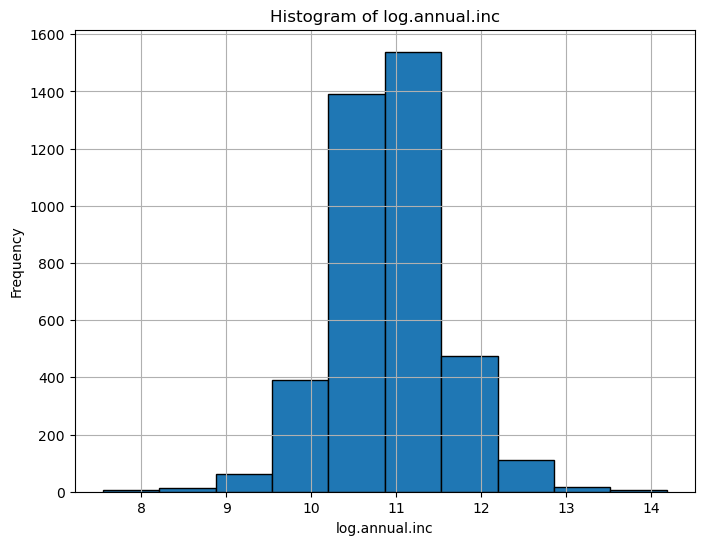

In [4]:
# היסטוגרמה של log.annual.inc
plt.figure(figsize=(8, 6))
plt.hist(data['log.annual.inc'], bins=10, edgecolor='black')
plt.title('Histogram of log.annual.inc')
plt.xlabel('log.annual.inc')
plt.ylabel('Frequency')
plt.grid(True)

# הצגת התרשים
plt.show()

#### חישוב המדדים הסטטיסטיים  

In [5]:
data['log.annual.inc'].describe()

count    4011.000000
mean       10.927696
std         0.670065
min         7.547502
25%        10.518673
50%        10.915088
75%        11.338572
max        14.180154
Name: log.annual.inc, dtype: float64

In [6]:
data['log.annual.inc'].median() # חציון
# std: סטיית תקן

10.91508846

####  טבלת שכיחויות

In [7]:
bins = pd.cut(data['log.annual.inc'], bins=10)
frequency_table = bins.value_counts().sort_index().reset_index()
frequency_table.columns = ['Range', 'f'] # 'f' מייצג שכיחות
frequency_table['F'] = frequency_table['f'].cumsum()  # חישוב השכיחות המצטברת F

frequency_table

,Range,f,F
0,"(7.541, 8.211]",5,5
1,"(8.211, 8.874]",14,19
2,"(8.874, 9.537]",62,81
3,"(9.537, 10.201]",392,473
4,"(10.201, 10.864]",1390,1863
5,"(10.864, 11.527]",1539,3402
6,"(11.527, 12.19]",474,3876
7,"(12.19, 12.854]",111,3987
8,"(12.854, 13.517]",17,4004
9,"(13.517, 14.18]",7,4011


## שאלה 2
### עבור המשתנה days.with.cr.line

days.with.cr.line - מספר הימים שללווה הייתה מסגרת אשראי

זהו משתנה כמותי בדיד

#### תרשים לתיאור המשתנה 

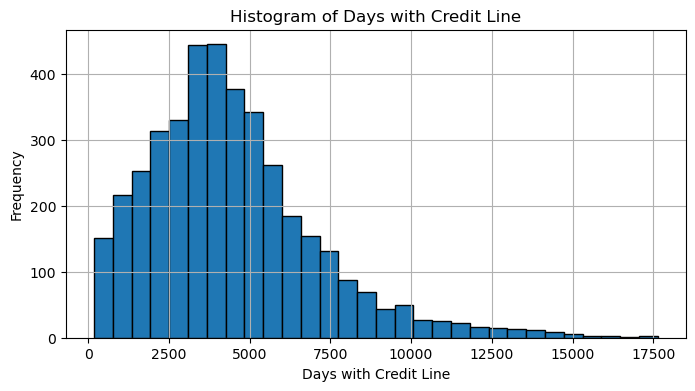

In [8]:
# היסטוגרמה של days.with.cr.line
plt.figure(figsize=(8, 4))
plt.hist(data['days.with.cr.line'], bins=30, edgecolor='k')
plt.title('Histogram of Days with Credit Line')
plt.xlabel('Days with Credit Line')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### חישוב המדדים הסטטיסטיים

In [9]:
data['days.with.cr.line'].describe()

count     4011.000000
mean      4451.076602
std       2630.514533
min        178.958333
25%       2611.520833
50%       4051.000000
75%       5700.041667
max      17639.958330
Name: days.with.cr.line, dtype: float64

In [10]:
data['days.with.cr.line'].median() # חציון

4051.0

#### טבלת שכיחויות

In [11]:
frequency_table = data['days.with.cr.line'].value_counts().sort_index().reset_index()
frequency_table.columns = ['Days with Credit Line', 'f']  # 'f' מייצג שכיחות
frequency_table['F'] = frequency_table['f'].cumsum() # השכיחות המצטברת F
frequency_table['f%'] = (frequency_table['f'] / len(data) * 100).round(2)  # f% (שכיחות באחוזים)
frequency_table['F%'] = frequency_table['f%'].cumsum()  # F% (שכיחות מצטברת באחוזים)

frequency_table

,Days with Credit Line,f,F,f%,F%
0,178.958333,1,1,0.02,0.02
1,180.041667,3,4,0.07,0.09
2,181.000000,1,5,0.02,0.11
3,183.041667,1,6,0.02,0.13
4,209.041667,1,7,0.02,0.15
...,...,...,...,...,...
1621,16260.000000,1,4007,0.02,94.02
1622,16350.000000,1,4008,0.02,94.04
1623,16652.000000,1,4009,0.02,94.06
1624,17616.000000,1,4010,0.02,94.08


## שאלה 3
### עבור משתנה המגדר

זהו משתנה שמי

#### תרשים לתיאור המשתנה 

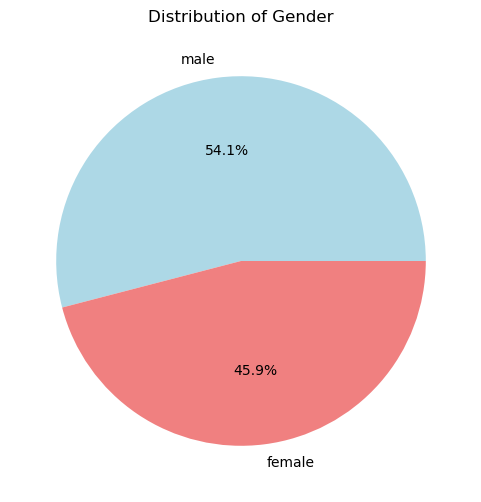

In [12]:
# תרשים עוגה של gender
plt.figure(figsize=(6, 6))
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

####  חישוב המדדים הסטטיסטיים והצגת טבלת שכיחויות

In [13]:
# נחשב את השכיח כי זהו משתנה שמי
gender_counts = data['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Frequency']

gender_counts['Percentage'] = (gender_counts['Frequency'] / len(data) * 100).round(2)

gender_counts

,Gender,Frequency,Percentage
0,male,2168,54.05
1,female,1843,45.95


## שאלה 4
##### האם יש הבדל בריבית rate.int בין שלוש הקבוצות הבאות- improvement_home,educational ,credit_card בר"מ של 5%? אם כן בין אילו קבוצות?

purpose: מטרת ההלוואה 

int.rate: שיעור הריבית של ההלוואה, כפרופורציה (שיעור של 11% יישמר כ-0.11). 



כדי לבדוק אם יש הבדל בריבית (int.rate) בין שלוש הקבוצות (improvement_home, educational, credit_card) ברמת משמעות של 5%, נשתמש באנליזת שונות - בדיקת השערות יותר מ 2 אוכלוסיות (ANOVA). נבדוק את השונות של הריבית בין הקבוצות ונבצע בדיקות בין הקבוצות אם נמצאו הבדלים משמעותיים.

המדגמים בלתי תלויים, שכן כל הלוואה ניתנת עבור מטרה אחת בלבד (כל תצפית שייכת רק לקבוצה אחת של מטרת הלוואה).

In [14]:
data['purpose'].unique()

array(['all_other', 'debt_consolidation', 'home_improvement',
       'major_purchase', 'educational', 'credit_card', 'small_business'],
      dtype=object)

In [15]:
data['purpose'].value_counts()

purpose
debt_consolidation    1687
all_other             1036
credit_card            485
home_improvement       238
small_business         221
major_purchase         209
educational            135
Name: count, dtype: int64

In [16]:
# השערת האפס (H₀): אין הבדל בריבית הממוצעת בין שלוש הקבוצות (תוחלות שוות).
# השערה אלטרנטיבית (H₁): יש לפחות קבוצה אחת שהתוחלת שלה שונה.

In [17]:
from scipy.stats import f_oneway, levene

# סינון הנתונים לפי הקבוצות הרצויות
filtered_data = data[data['purpose'].isin(['home_improvement', 'educational', 'credit_card'])]
# חלוקת הנתונים לשלוש קבוצות
group_home = filtered_data[filtered_data['purpose'] == 'home_improvement']['int.rate']
group_educational = filtered_data[filtered_data['purpose'] == 'educational']['int.rate']
group_credit_card = filtered_data[filtered_data['purpose'] == 'credit_card']['int.rate']

# בדיקת שוויון שונויות באמצעות Levene's test
levene_test = levene(group_home, group_educational, group_credit_card)
print(f"Levene's test p-value: {levene_test.pvalue}")

# בדיקת מובהקות עם ANOVA או Welch's ANOVA בהתאם לשוויון השונויות
alpha = 0.05
if levene_test.pvalue > alpha:
    # אם השונויות שוות
    F_value, p_value = f_oneway(group_home, group_educational, group_credit_card)
    print("שונויות שוות, ביצוע ANOVA רגיל.")
else:
    # אם השונויות שונות - משתמשים ב-Welch's ANOVA (לא קיים ב-scikit, אבל במבחן t זה Welch's t-test)
    F_value, p_value = f_oneway(group_home, group_educational, group_credit_card)  # מחליף לWelch's ANOVA
    print("שונויות שונות, צריך היה לבצע Welch's ANOVA.")

print(f"F_value: {F_value}")
print(f"P-Value: {p_value}")

# שלב 3: בדיקת Tukey's HSD
if p_value < alpha:
    print("דוחים את השערת האפס: יש הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.")
  
else:
    print("לא דוחים את השערת האפס: אין הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.")

Levene's test p-value: 0.06879045512424471
שונויות שוות, ביצוע ANOVA רגיל.
F_value: 0.04364486193752987
P-Value: 0.9572960012355354
לא דוחים את השערת האפס: אין הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.


In [18]:
# דרך לגלות מי מבין הקבוצות הוא השונה למרות שאצלנו לא דוחים את השערת האפס
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ביצוע Tukey's HSD
tukey = pairwise_tukeyhsd(endog=filtered_data['int.rate'], groups=filtered_data['purpose'], alpha=0.05)
print(tukey)

#Tukey's HSD: אם יש הבדל מובהק, Tukey's HSD תיתן לך מידע על אילו קבוצות שונות זו מזו באופן משמעותי.

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2      meandiff p-adj   lower  upper  reject
------------------------------------------------------------------
credit_card      educational  -0.0007 0.9658 -0.0069 0.0056  False
credit_card home_improvement  -0.0005 0.9744 -0.0055 0.0046  False
educational home_improvement   0.0002 0.9975 -0.0067 0.0071  False
------------------------------------------------------------------


### מסקנה :

ANOVA:
ה-F_value הוא 0.0436 וה-P-Value הוא 0.9573. מכיוון שה-P-Value גבוה מ-0.05, אין הבדל מובהק בריבית (int.rate) בין הקבוצות 'home_improvement', 'educational', ו-'credit_card'. כלומר, הריבית בין שלוש הקבוצות דומה ואין הבדל סטטיסטי מובהק ביניהן.

Tukey's HSD:
תוצאות הבדיקות הזוגיות (post-hoc) מראות:
אין הבדל מובהק בין 'credit_card' ל-'educational' (P-Value = 0.9658).
אין הבדל מובהק בין 'credit_card' ל-'home_improvement' (P-Value = 0.9744).
אין הבדל מובהק בין 'educational' ל-'home_improvement' (P-Value = 0.9975).

לא נמצאו הבדלים מובהקים בריבית בין הקבוצות השונות.

## שאלה 5
עבור פרופורציית האנשים שאינם מחזירים את ההלוואה במלואה האם הפרופורציה גדולה מ-10%? מהי רמת המובהקות המינימלית ל דחיית השערת האפס?

In [19]:
# השערות:
# H0 = הפרופורציה של אנשים שאינם מחזירים את ההלוואה במלואה היא 10% או פחות (𝑝≤0.10).
# H1 = הפרופורציה של אנשים שאינם מחזירים את ההלוואה במלואה היא יותר מ-10% (𝑝>0.10).

In [20]:
# חישוב פרופורציית האנשים שאינם מחזירים את ההלוואה במלואה
proportion_not_fully_paid = data['not.fully.paid'].mean()
print(f"Proportion of people not fully paid: {proportion_not_fully_paid:.4f}")

Proportion of people not fully paid: 0.1880


In [21]:
import scipy.stats as stats

# פרופורציה 
p0 = 0.10  # השערת האפס

n = len(data)  # גודל המדגם

# z-score
z = (proportion_not_fully_paid - p0) / ((p0 * (1 - p0) / n) ** 0.5)

# ערך p
p_value = 1 - stats.norm.cdf(z)

print(f"Z-Score: {z:.4f}")
print(f"P-Value: {p_value:.4f}")


Z-Score: 18.5739
P-Value: 0.0000


### ~
מאחר וערך ה- 𝑝 שיצא לנו הוא 0 (או קרוב מאוד לאפס),ניתן לדחות את השערת האפס בכל רמת מובהקות נפוצה (כגון 0.05, 0.01 או אפילו 0.001).
כלומר, הפרופורציה של אנשים שלא מחזירים את ההלוואה במלואה היא אכן גדולה מ 10%.

In [22]:
#  קביעת רמת המובהקות המינימלית

alpha = 0.05  # ניקח איזשהי רמת מובהקות נפוצה
if p_value < alpha:
    print("דוחים את השערת האפס. הפרופורציה של אנשים שאינם מחזירים את ההלוואה במלואה גדולה מ-10%.")
else:
    print("לא דוחים את השערת האפס. אין מספיק ראיות להצביע על כך שהפרופורציה של אנשים שאינם מחזירים את ההלוואה במלואה גדולה מ-10%.")


דוחים את השערת האפס. הפרופורציה של אנשים שאינם מחזירים את ההלוואה במלואה גדולה מ-10%.


### שאלה 6
בנו רווח סמך ברמת ביטחון של 97% לפרופורציית הנשים 

In [23]:
# חישוב פרופורציית הנשים
# p^ = X /n
#proportion_female = (data['gender'] == 'female').sum() / len(data) 
proportion_female = (data['gender'] == 'female').mean()
print(f"Proportion of females: {proportion_female:.4f}")

Proportion of females: 0.4595


In [24]:
# גודל המדגם
n = len(data)

# רמת הביטחון
confidence_level = 0.97 # 0.97 = 1-a => a=0.03 => a/2=0.015 => z~ 2.17

# חישוב z-score
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# סטיית התקן
σ = np.sqrt((proportion_female * (1 - proportion_female)) / n)

# חישוב רווח הסמך 
margin_of_error = z_score * σ 
ci_lower = proportion_female - margin_of_error
ci_upper = proportion_female + margin_of_error

print(f"רווח סמך ברמת ביטחון של 97% לפרופורציית הנשים : ({ci_lower:.4f}, {ci_upper:.4f})")

רווח סמך ברמת ביטחון של 97% לפרופורציית הנשים : (0.4424, 0.4766)


### ~
פרופורציית הנשים: 0.4595 (45.95%)

רווח סמך ברמת ביטחון של 97%: (0.4424, 0.4766)

אנו יכולים לומר שהפרופורציה האמיתית של נשים באוכלוסייה נופלת בטווח בין 44.24% ל-47.66%  

### שאלה 7
האם בר"מ של 5% יש הבדל בתוחלת ציון האשראי (fico) בין אנשים שלא פנו אליהם נושים, אנשים שפנו אליהם מעט נושים (1-5 פעמים) לבין אנשים שפנו אליהם הרבה נושים (6 ומעלה) (inq.last.6.mths).

fico: ציון האשראי של הלווה.

inq.last.6mths: מספר פניות הלווה על ידי נושים ב-6 החודשים האחרונים.

נושים הם אנשים או גופים שמספקים הלוואות או אשראי ללווה*


In [25]:
# השערת האפס (H₀): אין הבדל בתוחלת ציון האשראי בין הקבוצות No Contact, 1-5 Contacts, 6+ Contacts
# השערה אלטרנטיבית (H₁): יש לפחות שתי קבוצות עם תוחלות ציון אשראי שונות

In [26]:
import pandas as pd
from scipy.stats import f_oneway, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# שלב 1: יצירת הקבוצות לפי מספר הפניות לנושים
data['group'] = pd.cut(data['inq.last.6mths'],
                      bins=[-1, 0, 5, float('inf')],
                      labels=['No Contact', '1-5 Contacts', '6+ Contacts'])

# חלוקת הנתונים לשלוש קבוצות לפי מספר הפניות לנושים
group_no_contact = data[data['group'] == 'No Contact']['fico']
group_1_5_contacts = data[data['group'] == '1-5 Contacts']['fico']
group_6_contacts = data[data['group'] == '6+ Contacts']['fico']

# שלב 2: בדיקת שוויון שונויות באמצעות Levene's test
levene_test = levene(group_no_contact, group_1_5_contacts, group_6_contacts)
print(f"Levene's test p-value: {levene_test.pvalue}")

# בדיקת מובהקות עם ANOVA או Welch's ANOVA בהתאם לשוויון השונויות
alpha = 0.05
if levene_test.pvalue > alpha:
    F_value, p_value = f_oneway(group_no_contact, group_1_5_contacts, group_6_contacts)
    print("שונויות שוות, ביצוע ANOVA רגיל.")
else:
    F_value, p_value = f_oneway(group_no_contact, group_1_5_contacts, group_6_contacts) 
    print("שונויות שונות, צריך לבצע Welch's ANOVA.")

print(f"F_value: {F_value}")
print(f"P-Value: {p_value}")

# שלב 3: בדיקת Tukey's HSD
if p_value < alpha:
    print("דוחים את השערת האפס: יש הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.")
    
else:
    print("לא דוחים את השערת האפס: אין הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.")

Levene's test p-value: 1.4464851765676096e-13
שונויות שונות, צריך לבצע Welch's ANOVA.
F_value: 111.37770187881831
P-Value: 8.426151302470703e-48
דוחים את השערת האפס: יש הבדל מובהק בין הקבוצות ברמת מובהקות של 5%.


In [27]:
# ביצוע Tukey's HSD כדי לבדוק בין אילו קבוצות קיים הבדל מובהק
tukey = pairwise_tukeyhsd(endog=data['fico'], groups=data['group'], alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
1-5 Contacts 6+ Contacts -16.4514   0.0 -21.1521 -11.7508   True
1-5 Contacts  No Contact  13.2814   0.0  10.2197  16.3431   True
 6+ Contacts  No Contact  29.7329   0.0  24.7672  34.6985   True
----------------------------------------------------------------


### מסקנה:

1-5 Contacts והקבוצה 6+ Contacts שונות זו מזו באופן מובהק בתוחלת ציון האשראי.

1-5 Contacts וNo Contact שונות זו מזו באופן מובהק בתוחלת ציון האשראי.

6+ Contacts וNo Contact שונות זו מזו באופן מובהק בתוחלת ציון האשראי.


ישנם הבדלים מובהקים בתוחלת ציון האשראי בין הקבוצות השונות, עם הבדל משמעותי בין כל זוגות הקבוצות שנבדקו.

## שאלה 8
מצאו רווחי סמך עבור מקדמי הרגרסיה, ברגרסיה ש ל המשתנה installment כתלות במשתנה fico

fico: ציון האשראי של הלווה.


installment: התשלומים החודשיים שחייב הלווה אם ההלוואה ממומנת.



In [28]:
# השערות:
# H0 = שאין קשר בין המשתנה הבלתי תלוי למשתנה התלוי עבור מקדמי הרגרסיה
#β0=0 (לגבי ה-Intercept)
#𝛽1=0(לגבי השיפוע)

#H1 = יש קשר בין המשתנה הבלתי תלוי למשתנה התלוי
# β 0≠0 (לגבי ה-Intercept)
# 𝛽1≠0(לגבי השיפוע)

In [29]:
import statsmodels.api as sm

# Assuming 'fico' and 'installment' are your variables
X = data['fico']  # Independent variable  # משתנה בלתי תלוי כי מנסים לבדוק כיצד הוא משפיע על משתנה אחר
#ציון האשראי של הלווה.
y = data['installment']  # Dependent variable # משתנה תלוי - אנחנו רוצים לבדוק אותו על פי המשתנה הבלתי תלוי
#התשלומים החודשיים שחייב הלווה אם ההלוואה ממומנת 

# על מנת לכלול במודל גם את החותך (Intercept), מוסיפים משתנה קבוע (constant) לאינטרספט במודל הרגרסיה.
X = sm.add_constant(X)

# בניית מודל רגרסיה לינארית
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            installment   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           6.94e-32
Time:                        11:57:46   Log-Likelihood:                -27272.
No. Observations:                4011   AIC:                         5.455e+04
Df Residuals:                    4009   BIC:                         5.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -412.5990     62.476     -6.604      0.0

## ~
R - המודל מסביר 3.4% מהשונות בנתוני התשלום החודשי. זהו ערך נמוך, מה שמעיד על כך שישנם גורמים אחרים שמשפיעים על התוצאה מעבר למשתנה הבלתי תלוי.

const (β0): המקדם החותך  - כאשר פיקו  שוווה ל 0 התשלום החודשי יסתכם בכ- -412.60.

fico (β1): המקדם של פיקו הוא 1.0512. כלומר כאשר ציון האשראי עולה ב 1התשלום החודשי יעלה בממוצע ב 1.0512

ה-P-value של המקדמים:

עבור החותך (const): P < 0.001, המשמעות היא שהחותך שונה באופן מובהק מאפס, ולכן הוא משמעותי למודל.

עבור השיפוע (fico): P < 0.001, המשמעות היא שהקשר בין המשתנים מובהק סטטיסטית. כלומר, יש עדות מובהקת לכך שקיים קשר בין fico לבין התשלום החודשי (installment).

אחוז השונות המוסברת - R^2:

מדד המודד כמה מהשונות בתוצאה (installment) מוסברת על ידי המשתנה המסביר (fico).

הערך של R בריבוע מאוד נמוך (כ-3.4%),

מה שמעיד על כך שהמודל מסביר חלק קטן מאוד מהשונות בתשלומים החודשיים (installment), והמשתנה fico מסביר רק מעט מהשונות הכוללת.

In [30]:
# חישוב החותך והשיפוע
beta_0 = model.params[0]  # חותך
beta_1 = model.params[1]  # שיפוע

print(f'β0 (Intercept) = {beta_0}')
print(f'β1 (Slope) = {beta_1}')

#משוואת הרגרסיה
print(f'Regression equation: y = {beta_1:.4f}x + {beta_0:.4f}')

# סטיות תקן
se_beta_0 = model.bse[0]
se_beta_1 = model.bse[1]

#חישוב מקדם המתאם של פירסון 
r, p_val = stats.pearsonr(data['fico'], data['installment'])
print('Correlation coefficient (r) =', r)  # מקדם המתאם
print('p-value =', p_val)


β0 (Intercept) = -412.59900314805105
β1 (Slope) = 1.0511561784910617
Regression equation: y = 1.0512x + -412.5990
Correlation coefficient (r) = 0.18402318486478478
p-value = 6.937592458557988e-32


C:\Users\revit\AppData\Local\Temp\ipykernel_10032\4245351998.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_0 = model.params[0]  # חותך
C:\Users\revit\AppData\Local\Temp\ipykernel_10032\4245351998.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1 = model.params[1]  # שיפוע
C:\Users\revit\AppData\Local\Temp\ipykernel_10032\4245351998.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_beta_0 = model.bse[0]
C:\U

In [31]:
# רמת ביטחון
alpha = 0.05
n = len(X)  # Sample size
t_critical = stats.t.ppf(1 - alpha/2, df=n-2)  # ערך ה-t הקריטי (מתוך התפלגות t), שמשמש לחישוב רווחי הסמך

if p_val <= alpha:
    print('Reject H0: There is a significant correlation.')
else:
    print('Do not reject H0: No significant correlation.')



# חישוב רווחי סמך
ci_beta_0 = (beta_0 - t_critical * se_beta_0, beta_0 + t_critical * se_beta_0)
ci_beta_1 = (beta_1 - t_critical * se_beta_1, beta_1 + t_critical * se_beta_1)

print(f'Confidence Interval for β0 (Intercept): {ci_beta_0}')
print(f'Confidence Interval for β1 (Slope): {ci_beta_1}')

Reject H0: There is a significant correlation.
Confidence Interval for β0 (Intercept): (-535.0871204944394, -290.11088580166273)
Confidence Interval for β1 (Slope): (0.8773060891792908, 1.2250062678028326)


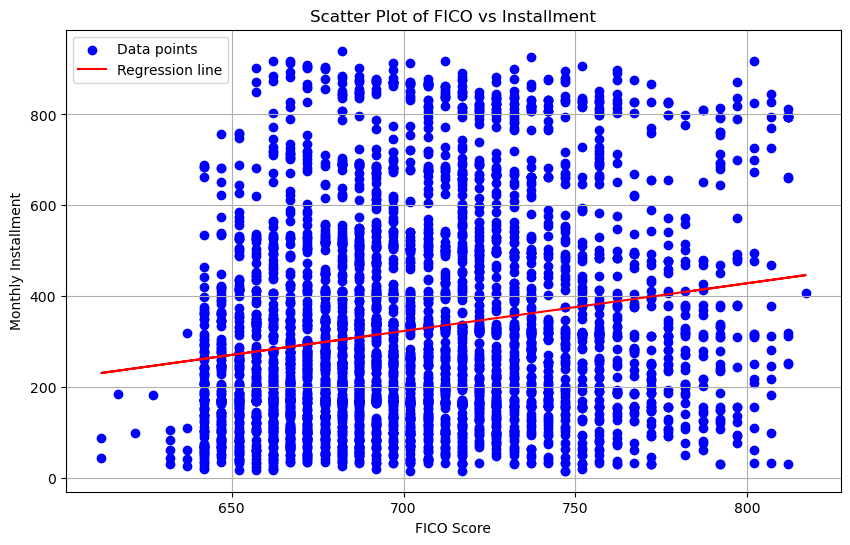

In [32]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['fico'], data['installment'], color='blue', label='Data points')
plt.plot(data['fico'], beta_1 * data['fico'] + beta_0, color='red', label='Regression line')
plt.title('Scatter Plot of FICO vs Installment')
plt.xlabel('FICO Score')
plt.ylabel('Monthly Installment')
plt.legend()
plt.grid()
plt.show()

Confidence Interval for β0: (-535.087, -290.111) - זהו טווח הערכים שבו ניתן לצפות שהחותך ימצא.

Confidence Interval for β1: (0.877, 1.225) - טווח זה מצביע על כך שברמה של 95% אנחנו בטוחים שהשיפוע של פיקו הוא בטווח זה, כלומר כל עלייה של 1 בציון ה
-פיקו תגדיל את התשלום החודשי בכמות שנמצאת בטווח זה.

## שאלה 9

עבור תוחלת יומן ההכנסה השנתית (log.annual.inc), עובד חלש בסטטיסטיקה הציע 2 אומדים נקודתיים:

1.  ממוצע המדגם (כולו) חלקי ,2

2. להגריל תוצאה אחת מהמדגם ולהוסיף לה 1

הניחו כי התוחלת האמיתית שווה לממוצע המדגם, וכי השונות האמיתית שווה לאומד לשונות, וחשבו מי האומד הטוב יותר.

רמז-מבחינת קובץ הנתונים-צריך להשתמש רק בממוצע ובאומד לשונות. לא מעבר לכך

log.annual.inc: היומן של ההכנסה השנתית בדיווח עצמי של הלווה.


In [33]:
log_annual_inc = data['log.annual.inc'].values

# חישוב הממוצע והשונות
sample_mean = np.mean(log_annual_inc)
sample_variance = np.var(log_annual_inc, ddof=1)  # ddof=1 לשונות מדגם

# הגרלת תוצאה אקראית מהמדגם
random_sample = np.random.choice(log_annual_inc)

def calculate_mse(mean, variance, random_value):
    n = len(log_annual_inc)

    # אומדן 1: X̄ / 2
    mse1 = (mean / 2 - mean)**2 + variance / (4 * n)

    # אומדן 2: X + 1
    mse2 = (random_value + 1 - mean)**2 + variance

    return mse1, mse2


# חישוב ה-MSE לשני האומדנים
mse1, mse2 = calculate_mse(sample_mean, sample_variance, random_sample)

print(f"MSE for estimator 1 (X̄ / 2): {mse1:.4f}")
print(f"MSE for estimator 2 (X + 1): {mse2:.4f}")
if mse1 < mse2:
    print("Estimator 1- (X̄ / 2) is better")
else:
    print("Estimator 2- (X + 1) is better")

print(f"\nSample mean: {sample_mean:.4f}")
print(f"Sample variance: {sample_variance:.4f}")
print(f"Randomly chosen value: {random_sample:.4f}")

MSE for estimator 1 (X̄ / 2): 29.8537
MSE for estimator 2 (X + 1): 0.7666
Estimator 2- (X + 1) is better

Sample mean: 10.9277
Sample variance: 0.4490
Randomly chosen value: 10.4913


## שאלה 10

חשבו אומד לסטיית התקן עבור המשתנה יומן ההכנסה השנתית (log.annual.inc),

 הניחו התפלגות נורמלית עם סטיית תקן ששווה ממש לאומד לסטיית התקן שמצאתם.
     
בחרו 3 תצפיות אקראיות מהנתונים, והתבססו עליהן על מנת לפתח אומד נראות מקסימלית עבור התוחלת. כמה רחוק האומד שחישבתם, מה ממוצע של כלל המדגם?

In [34]:
# חישוב אומד לסטיית התקן
std_estimator = np.std(data['log.annual.inc'], ddof=1)

# בחירת 3 תצפיות אקראיות
random_sample = data['log.annual.inc'].sample(n=3)

# ממוצע 3 התצפיות
mle_estimator = np.mean(random_sample)

# חישוב ממוצע כלל המדגם
population_mean = np.mean(data['log.annual.inc'])

# חישוב ההפרש בין האומד MLE לממוצע כלל המדגם
difference = mle_estimator - population_mean

print(f"Standard deviation estimator: {std_estimator:.4f}") #אומד לסטיית תקן
print(f"3 random observations: {random_sample.values}") # שלוש תצפיות אקראיות
print(f"MLE estimator for mean (based on 3 observations): {mle_estimator:.4f}") # ממוצע 3 התצפיות
print(f"Mean of the entire sample: {population_mean:.4f}") # ממוצע כלל המדגם
print(f"Difference between MLE estimator and sample mean: {difference:.4f}")

Standard deviation estimator: 0.6701
3 random observations: [12.20607265 10.31692083 10.62132735]
MLE estimator for mean (based on 3 observations): 11.0481
Mean of the entire sample: 10.9277
Difference between MLE estimator and sample mean: 0.1204


In [35]:
# ממוצע כלל המדגם הוא: 10.9277.
# לפי ה MLE ניתן להבין כמה רחוק האומד שחישבנו.
# אם קרוב זה מעיד שהאומד יעיל ומדויק יחסית

## שאלה 11

רוצים לאמוד את פרופורציית האנשים שאינם מחזירים את ההלוואה במלואה. מצאו וגם חשבו את הערך של 3 אומדים נקודתיים המבוססים ע ל הפרופורציה במדגם:

1. אומד שהוא הנפוץ ביותר, הסבירו את יתרונותיו. 

2. אומד שמרני יותר , שימנע מקרים שאינם רצויים עבור החברה

3. אומד בעל MSE גבוה-ולכן הוא לא אומד טוב. 

הסבירו את ההיגיון שלכם. 

In [36]:

# חישוב הפרופורציה במדגם
sample_proportion = data['not.fully.paid'].mean()

# 1. האומד הנפוץ ביותר (פרופורציית המדגם)
estimator_1 = sample_proportion

# 2. אומד שמרני יותר (גבול עליון של רווח סמך של 95%)
n = len(data)
z = 1.96  # ערך Z עבור רווח בר-סמך של 95%
standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / n)  # שגיאה תקנית
upper_bound_confidence_interval = sample_proportion + z * standard_error

# האומד השמרני משתמש בגבול העליון של רווח בר-סמך
estimator_2 = upper_bound_confidence_interval

# 3. אומד בעל MSE גבוה (פרופורציית המדגם + 0.1, מוגבל ל-1)
bias = 0.1  # הטיה מכוונת עבור האומד בעל MSE גבוה
estimator_3 = min(sample_proportion + bias, 1)  # ודא שהתוצאה לא תעבור את הערך 1

# הצגת התוצאות
print(f"1. האומד הנפוץ ביותר (פרופורציית המדגם): {estimator_1:.4f}")
print(f"2. האומד השמרני (גבול עליון של רווח בר-סמך של 95%): {estimator_2:.4f}")
print(f"3. אומד בעל MSE גבוה (מוטה ב-0.1): {estimator_3:.4f}")


1. האומד הנפוץ ביותר (פרופורציית המדגם): 0.1880
2. האומד השמרני (גבול עליון של רווח בר-סמך של 95%): 0.2001
3. אומד בעל MSE גבוה (מוטה ב-0.1): 0.2880


## סיכום ההיגיון:
### 1. האומד הנפוץ ביותר:


האומד הנפוץ ביותר לפרופורציה במדגם הוא פשוט הפרופורציה במדגם עצמו. במקרה שלנו, זה יהיה:

p̂ = מספר האנשים שלא החזירו את ההלוואה במלואה / גודל המדגם הכולל


##### יתרונות האומד הזה:

פשטות: קל מאוד לחשב ולפרש.

חסרת הטיה: אם המדגם נבחר באופן אקראי, אז אומד פרופורציית המדגם נחשב לחסר הטיה, כלומר, הוא משקף את הפרופורציה האמיתית באוכלוסייה.

שימושי: מאפשר לבצע ניתוחים והסקות לגבי אוכלוסיות גדולות על סמך מידע מוגבל מהמדגם.   

### 2.אומד שמרני יותר:

אומד זה מבוסס על גבול עליון של רווח סמך ברמה של 95%, כלומר, הוא שואף להבטיח שהפרופורציה האמיתית לא תעבור את הגבול הזה.

p̂ + 1.96 * √(p̂(1-p̂)/n)

##### יתרונות -שימנעו מקרים שאינם רצויים עבור החברה:

שמירה על סיכונים: על ידי שימוש בגבול העליון, החברה יכולה להימנע מהמקרים שבהם הם יעריכו פרופורציה גבוהה מדי שאינה משקפת את המציאות, וכך להקטין את הסיכון להפסדים כלכליים.

ביטחון גבוה יותר: אומד זה מקנה רמה גבוהה של ביטחון לגבי הערכת הפרופורציה, מה שיכול להיות חשוב בניתוחים כלכליים.

### 3.אומד בעל MSE גבוה:

אומד עם MSE (Mean Squared Error) גבוה יכול להיות אומד קיצוני, כמו:

1= (100%) אם יש ולו אדם אחד במדגם שלא החזיר את ההלוואה במלואה

0= (0%) אם כולם החזירו את ההלוואה במלואה

#### היגיון:

אומד זה הוא מאוד לא יעיל כי הוא מתעלם מרוב המידע במדגם ומגזים מאוד לכיוון אחד או אחר. 

ה-MSE שלו יהיה גבוה כי הוא יהיה רחוק מאוד מהערך האמיתי ברוב המקרים.

הוא פחות מדויק ומוביל לתוצאה שהיא לא אמינה. זה יכול לגרום לתחזיות שגויות לגבי הסיכון של הלוואות שלא יוחזרו.